In [1]:
import numpy as np
import numpy.random as rnd
import importlib

from tcpr import TargetContrastivePessimisticClassifier
from util import one_hot
from viz import plotqda

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "normal"
plt.rcParams['font.size'] = 20
plt.rcParams["font.weight"] = "bold"

xl = [-8, 8]
yl = [-6, 10]
fS = 20

In [3]:
# Generate source data
N = 100
N0 = 50
N1 = N - N0
X0 = rnd.multivariate_normal([-2, 0], [[1, 0], [0, 1]], N0)
X1 = rnd.multivariate_normal([+2, 0], [[1, 0], [0, 1]], N1)
X = np.vstack((X0, X1))
y = np.hstack((np.ones((N0,)), 2*np.ones((N1,))))

In [4]:
# Divergence
alpha = 1

# Generate target data
M = 100
M0 = 50
M1 = M - M0
Z0 = rnd.multivariate_normal(alpha*np.array([-1, 2]), alpha*np.array([[3, 2], [2, 4]]), M0)
Z1 = rnd.multivariate_normal(alpha*np.array([+2, 1]), alpha*np.array([[3, 2], [2, 4]]), M1)
Z = np.vstack((Z0, Z1))
u = np.hstack((np.ones((M0,)), 2*np.ones((M1,))))

In [5]:
# Train TCPR
C = TargetContrastivePessimisticClassifier(loss='qda', l2=1e-0)
C.fit(X, y, Z)

Y, labels = one_hot(y)
eta = C.discriminant_parameters(X, Y)
theta = C.get_params()

Starting TCP optimization
Iteration 1/500, TCP Risk = -2.8837494628493445
Broke at iteration 7, TCP Risk = -2.906827889019649


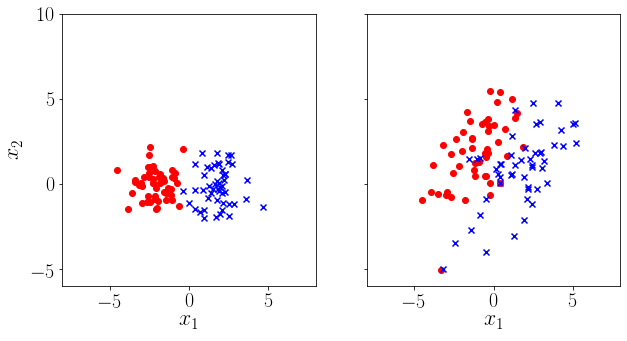

In [13]:
# Visualize setting
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(10,5))
ax[0].set_xlim(xl)
ax[0].set_ylim(yl)

ax[0].scatter(X0[:, 0], X0[:, 1], c='r', marker='o')
ax[0].scatter(X1[:, 0], X1[:, 1], c='b', marker='x')

ax[1].scatter(Z0[:, 0], Z0[:, 1], c='r', marker='o')
ax[1].scatter(Z1[:, 0], Z1[:, 1], c='b', marker='x')

ax[0].set_ylabel("$$x_2$$", fontsize=fS+2)
ax[0].set_xlabel("$$x_1$$", fontsize=fS+2)
ax[1].set_xlabel("$$x_1$$", fontsize=fS+2)

fig.savefig("viz/da_problem-setting_alpha" + str(alpha) + ".png", dpi=300, bbox_inches='tight')

Text(0.5, 0, '$$x_1$$')

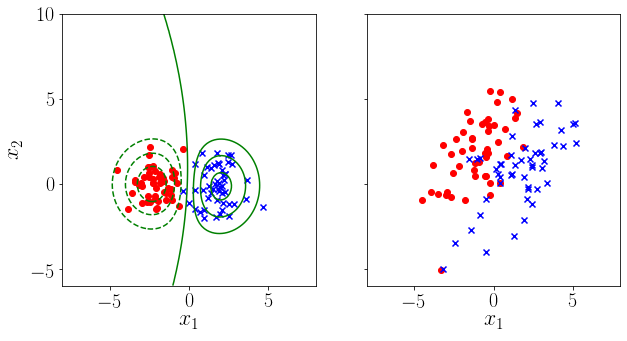

In [14]:
# Show source QDA
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(10,5))
ax[0].set_xlim(xl)
ax[0].set_ylim(yl)

ax[0].scatter(X0[:, 0], X0[:, 1], c='r', marker='o')
ax[0].scatter(X1[:, 0], X1[:, 1], c='b', marker='x')

ax[1].scatter(Z0[:, 0], Z0[:, 1], c='r', marker='o')
ax[1].scatter(Z1[:, 0], Z1[:, 1], c='b', marker='x')

plotqda(eta, ax=ax[0], colors='g')

ax[0].set_ylabel("$$x_2$$", fontsize=fS+2)
ax[0].set_xlabel("$$x_1$$", fontsize=fS+2)
ax[1].set_xlabel("$$x_1$$", fontsize=fS+2)

# fig.savefig("viz/da_qda_alpha" + str(alpha) + ".png", dpi=100, bbox_inches='tight')

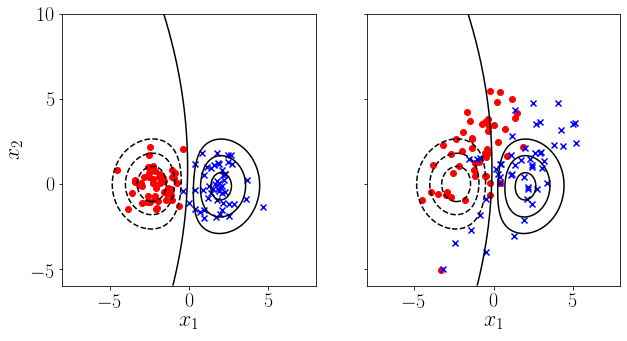

In [15]:
# Show source QDA
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(10,5))
ax[0].set_xlim(xl)
ax[0].set_ylim(yl)

ax[0].scatter(X0[:, 0], X0[:, 1], c='r', marker='o')
ax[0].scatter(X1[:, 0], X1[:, 1], c='b', marker='x')

ax[1].scatter(Z0[:, 0], Z0[:, 1], c='r', marker='o')
ax[1].scatter(Z1[:, 0], Z1[:, 1], c='b', marker='x')

plotqda(eta, ax=ax[0], colors='k')
plotqda(eta, ax=ax[1], colors='k')

ax[0].set_ylabel("$x_2$", fontsize=fS+2)
ax[0].set_xlabel("$x_1$", fontsize=fS+2)
ax[1].set_xlabel("$x_1$", fontsize=fS+2)

fig.savefig("viz/example_target-risk-of-source-classifier.png", dpi=100, bbox_inches='tight')
fig.savefig("viz/example_target-risk-of-source-classifier.eps", dpi=100, bbox_inches='tight')

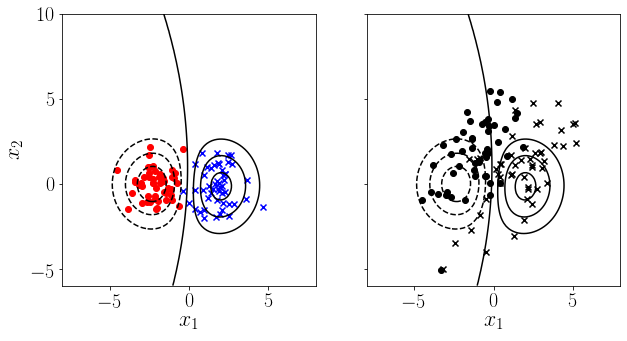

In [9]:
# Show source QDA
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(10,5))
ax[0].set_xlim(xl)
ax[0].set_ylim(yl)

ax[0].scatter(X0[:, 0], X0[:, 1], c='r', marker='o')
ax[0].scatter(X1[:, 0], X1[:, 1], c='b', marker='x')

ax[1].scatter(Z0[:, 0], Z0[:, 1], c='k', marker='o')
ax[1].scatter(Z1[:, 0], Z1[:, 1], c='k', marker='x')

plotqda(eta, ax=ax[0], colors='k')
plotqda(eta, ax=ax[1], colors='k')

ax[0].set_ylabel("$x_2$", fontsize=fS+2)
ax[0].set_xlabel("$x_1$", fontsize=fS+2)
ax[1].set_xlabel("$x_1$", fontsize=fS+2)

fig.savefig("viz/example_target-risk-of-source-classifier-black.png", dpi=100, bbox_inches='tight')
fig.savefig("viz/example_target-risk-of-source-classifier-black.eps", dpi=100, bbox_inches='tight')

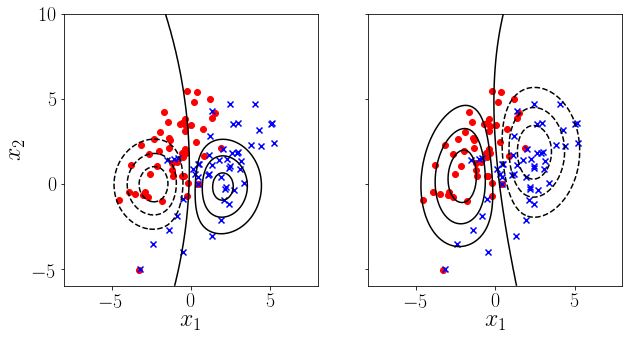

In [22]:
# Visualize QDA decision boundary
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(10,5))
ax[0].set_xlim(xl)
ax[0].set_ylim(yl)

ax[0].scatter(Z0[:, 0], Z0[:, 1], c='r', marker='o')
ax[0].scatter(Z1[:, 0], Z1[:, 1], c='b', marker='x')

ax[1].scatter(Z0[:, 0], Z0[:, 1], c='r', marker='o')
ax[1].scatter(Z1[:, 0], Z1[:, 1], c='b', marker='x')

plotqda(eta, ax=ax[0], colors='k')
plotqda(theta, ax=ax[1], colors='k')

ax[0].set_ylabel("$x_2$", fontsize=fS+4)
ax[0].set_xlabel("$x_1$", fontsize=fS+4)
ax[1].set_xlabel("$x_1$", fontsize=fS+4)

fig.savefig("viz/example_classifiers-on-target-data.png", dpi=100, bbox_inches='tight')
fig.savefig("viz/example_classifiers-on-target-data.eps", dpi=100, bbox_inches='tight')

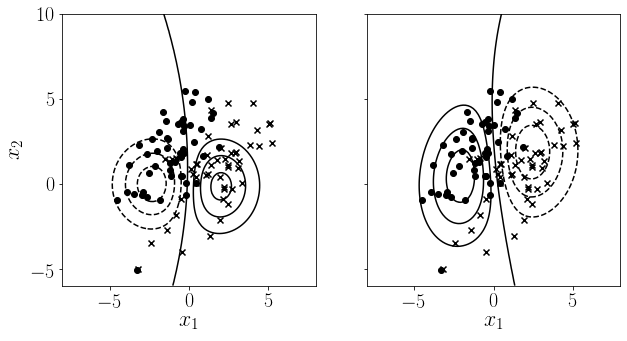

In [11]:
# Visualize QDA decision boundary
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(10,5))
ax[0].set_xlim(xl)
ax[0].set_ylim(yl)

ax[0].scatter(Z0[:, 0], Z0[:, 1], c='k', marker='o')
ax[0].scatter(Z1[:, 0], Z1[:, 1], c='k', marker='x')

ax[1].scatter(Z0[:, 0], Z0[:, 1], c='k', marker='o')
ax[1].scatter(Z1[:, 0], Z1[:, 1], c='k', marker='x')

plotqda(eta, ax=ax[0], colors='k')
plotqda(theta, ax=ax[1], colors='k')

ax[0].set_ylabel("$x_2$", fontsize=fS+2)
ax[0].set_xlabel("$x_1$", fontsize=fS+2)
ax[1].set_xlabel("$x_1$", fontsize=fS+2)

fig.savefig("viz/example_classifiers-on-target-data-black.png", dpi=100, bbox_inches='tight')
fig.savefig("viz/example_classifiers-on-target-data-black.eps", dpi=100, bbox_inches='tight')

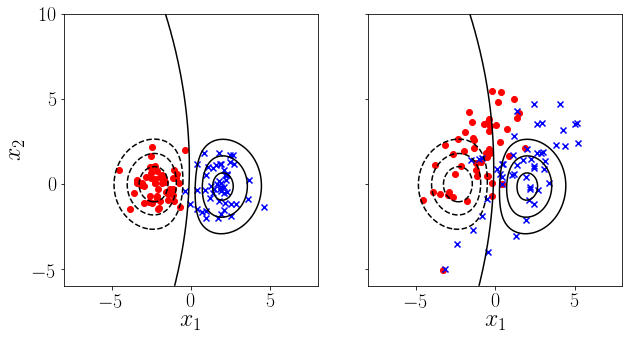

In [21]:
# Show source QDA
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(10,5))
ax[0].set_xlim(xl)
ax[0].set_ylim(yl)

ax[0].scatter(X0[:, 0], X0[:, 1], c='r', marker='o')
ax[0].scatter(X1[:, 0], X1[:, 1], c='b', marker='x')

ax[1].scatter(Z0[:, 0], Z0[:, 1], c='r', marker='o')
ax[1].scatter(Z1[:, 0], Z1[:, 1], c='b', marker='x')

plotqda(eta, ax=ax[0], colors='k')
plotqda(eta, ax=ax[1], colors='k')

ax[0].set_ylabel("$x_2$", fontsize=fS+4)
ax[0].set_xlabel("$x_1$", fontsize=fS+4)
ax[1].set_xlabel("$x_1$", fontsize=fS+4)

fig.savefig("viz/example_target-risk-of-source-classifier.png", dpi=100, bbox_inches='tight')
fig.savefig("viz/example_target-risk-of-source-classifier.eps", dpi=100, bbox_inches='tight')